In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.spatial.distance as sd

#Load the file
file="dbscan.txt"
data = np.loadtxt(file,dtype='float')

In [10]:
#Distance Matrix
def distance_matrix_calc(data):
    dist_mat = np.zeros((data.shape[0],data.shape[0]))
    dist_mat = sd.cdist(data, data, metric = 'euclid')
    return dist_mat

In [11]:
#Find the Cluster
def find_cluster(corepoint_index,gene_data, adj,cluster,eps, min_points,end_point,seen,dist_matrix):
     i=0
     while i < len(adj):        
         if(not seen[adj[i]]):
             seen[adj[i]]=True
             new_neighbours = compute_region(adj[i],gene_data,eps,dist_matrix)
             if(len(new_neighbours) >= min_points):
                 adj=adj+new_neighbours
             if(end_point[adj[i]]==0):
                 end_point[adj[i]]=cluster;
         i=i+1

In [12]:
#Compute the adjacent points in region
def compute_region(qp_index,gene_data,eps,dist_matrix):
    adj = []

    for i in range(len(gene_data)):
        if dist_matrix[qp_index][i] <= eps:
            adj.append(i)

    return adj

In [13]:
#DBSCAN function
def density_based_scan(gene_data,eps,min_points,seen,end_point,dist_matrix):
    cluster=0

    for i in range(len(gene_data)):

        if(not seen[i]):
            seen[i]=True
            adj = compute_region(i,gene_data,eps,dist_matrix)
            if(len(adj)<min_points):
                end_point[i]=0
            else:
                cluster=cluster+1;
                end_point[i]=cluster;
                find_cluster(i,gene_data, adj,cluster,eps, min_points,end_point,seen,dist_matrix)


In [14]:
#Plotting the clusters
def plots(pca_data,assigned_cluster,file):
    df_new = pd.DataFrame({'y1':np.array(pca_data)[:,0], 'y2':np.array(pca_data)[:,1], 'clusters': assigned_cluster})
    sns.lmplot(x='y1', y='y2', data=df_new, fit_reg=False,hue='clusters',palette = 'dark', height=5,aspect = 1.5,legend_out = False)
    plt.title(file)

In [15]:
#Calculating m values using ground truth values and density based cluster values
def get_count(gene_data,end_point,ground_truth):
    tp = 0
    tn = 0
    fp=0
    fn=0
    for i in range(len(data)):
        for j in range(len(data)):
            if ground_truth[i]==ground_truth[j]:
                if end_point[j]:
                    tp = tp + 1
                else:
                    fn = fn +1
            elif ground_truth[i]!=ground_truth[j]:
                if end_point[i]==end_point[j]:
                    fp = fp +1
                else:
                    tn = tn+1
    return tp,tn,fp,fn

Enter the epsilon value
0.5
Enter the minimum number of points
5
Density based Clustering Results 
--------------------------------------------
Rand Index for file dbscan.txt is 0.6512809917355372
Jaccard Coefficient for file dbscan.txt is 0.44979788759942624


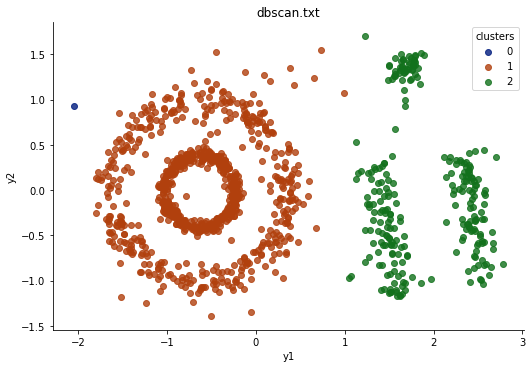

In [16]:
#Main Function
def __main__():
    gene_data= data[:,2:]
    print("Enter the epsilon value")
    eps = float(input()) #1.13
    print("Enter the minimum number of points")
    min_points = int(input()) #3
    ground_truth = data[:,1]
    dist_matrix = distance_matrix_calc(gene_data)
    end_point =np.zeros(len(gene_data),dtype=int)
    
    seen=np.zeros(len(gene_data),dtype=bool)
    
    #Dbscan
    density_based_scan(gene_data,eps,min_points,seen,end_point,dist_matrix)
    
    #PCA Part
    pca_data = PCA(n_components=2).fit_transform(gene_data)
    
    #Scatter plots of clusters
    plots(pca_data, end_point, file)
    
    #External_indices
    tp,tn,fp,fn = get_count(gene_data,end_point,ground_truth)
    
    #Jaccard Coefficient
    j_coeff=(tp)/(tp+fp+fn)
    
    #Rand Index
    rand_index = (tp+tn)/(tp+tn+fp+fn)
    
    print("Density based Clustering Results ")
    print("--------------------------------------------")
    print("Rand Index for file {} is {}".format(file,str(rand_index)))
    print("Jaccard Coefficient for file {} is {}".format(file,str(j_coeff)))

__main__()